# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps.core.process import create_process
from aeromaps.core.models import models_simple

In [2]:
process = create_process(models=models_simple)

## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

In [3]:
process.list_float_inputs()

{'rpk_short_range_measures_final_impact': 0,
 'rpk_medium_range_measures_final_impact': 0,
 'rpk_long_range_measures_final_impact': 0,
 'rpk_short_range_measures_start_year': 2051,
 'rpk_medium_range_measures_start_year': 2051,
 'rpk_long_range_measures_start_year': 2051,
 'rpk_short_range_measures_duration': 5,
 'rpk_medium_range_measures_duration': 5,
 'rpk_long_range_measures_duration': 5,
 'short_range_rpk_share_2019': 27.2,
 'medium_range_rpk_share_2019': 35.1,
 'long_range_rpk_share_2019': 37.7,
 'covid_start_year': 2020,
 'covid_rpk_drop_start_year': 66.0,
 'covid_end_year': 2024,
 'covid_end_year_reference_rpk_ratio': 100.0,
 'cagr_passenger_short_range_reference_periods': [],
 'cagr_passenger_short_range_reference_periods_values': [3.0],
 'cagr_passenger_medium_range_reference_periods': [],
 'cagr_passenger_medium_range_reference_periods_values': [3.0],
 'cagr_passenger_long_range_reference_periods': [],
 'cagr_passenger_long_range_reference_periods_values': [3.0],
 'load_fact

 In the following, some main parameters are for instance set up.

In [4]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 85  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_long_range_dropin_fuel_gain = 1.5

## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.fleet_renewal_duration = 5.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range = 1.0

In [7]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

In [9]:
# Carbon offset
process.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
process.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 85.0]
process.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]

In [10]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 250.0

In [11]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [12]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 100, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 0.0, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 0.0, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 0.0, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 200.0, 100.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 100, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [71, 0, 0, 0]

## Compute

Once all the parameters have been set up, the user can compute.

In [13]:
process.compute()

## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [14]:
process.data["float_outputs"]

{'cagr_rpk_short_range': 1.5291534592603684,
 'cagr_rpk_medium_range': 2.5948580077686634,
 'cagr_rpk_long_range': 2.5948580077686634,
 'cagr_rpk': 2.3354016834591818,
 'prospective_evolution_rpk_short_range': 57.66051931881593,
 'prospective_evolution_rpk_medium_range': 115.65912675438427,
 'prospective_evolution_rpk_long_range': 115.65912675438427,
 'prospective_evolution_rpk': 99.8835055319097,
 'cagr_rtk': 2.5948580077686634,
 'prospective_evolution_rtk': 115.65912675438419,
 'gross_carbon_budget': 1130.0,
 'gross_carbon_budget_2050': 797.2411428790518,
 'aviation_carbon_budget': 20.72826971485535,
 'equivalent_gross_carbon_budget': 1574.4444444444443,
 'equivalent_gross_carbon_budget_2050': 1102.610171118651,
 'aviation_equivalent_carbon_budget': 56.23311872705119,
 'solid_waste_biomass': 11.0,
 'oil_crops_biomass': 5.67,
 'sugarystarchy_crops_biomass': 17.64,
 'lignocellulosic_crops_biomass': 39.69,
 'available_biomass_hefa_fog': 1.0,
 'available_biomass_hefa_others': 20.67,
 'av

In [15]:
process.data["vector_outputs"]

,abatement_potential_atj,abatement_potential_electrofuel,abatement_potential_ft_msw,abatement_potential_ft_others,abatement_potential_hefa_fog,abatement_potential_hefa_others,annual_growth_rate_freight,annual_growth_rate_passenger,annual_growth_rate_passenger_long_range,annual_growth_rate_passenger_medium_range,annual_growth_rate_passenger_short_range,ask,ask_long_range,ask_long_range_dropin_fuel,ask_long_range_dropin_fuel_share,ask_long_range_electric,ask_long_range_electric_share,ask_long_range_hydrogen,ask_long_range_hydrogen_share,ask_medium_range,ask_medium_range_dropin_fuel,ask_medium_range_dropin_fuel_share,ask_medium_range_electric,ask_medium_range_electric_share,ask_medium_range_hydrogen,ask_medium_range_hydrogen_share,ask_short_range,ask_short_range_dropin_fuel,ask_short_range_dropin_fuel_share,ask_short_range_electric,ask_short_range_electric_share,ask_short_range_hydrogen,ask_short_range_hydrogen_share,biofuel_atj_capex,biofuel_atj_efficiency,biofuel_atj_emission_factor,biofuel_atj_mfsp,biofuel_atj_share,biofuel_carbon_tax_atj,biofuel_carbon_tax_ft_msw,biofuel_carbon_tax_ft_others,biofuel_carbon_tax_hefa_fog,biofuel_carbon_tax_hefa_others,biofuel_cost_atj,biofuel_cost_ft_msw,biofuel_cost_ft_others,biofuel_cost_hefa_fog,biofuel_cost_hefa_others,biofuel_cost_premium_atj,biofuel_cost_premium_ft_msw,biofuel_cost_premium_ft_others,biofuel_cost_premium_hefa_fog,biofuel_cost_premium_hefa_others,biofuel_ft_efficiency,biofuel_ft_msw_capex,biofuel_ft_msw_emission_factor,biofuel_ft_msw_mfsp,biofuel_ft_msw_share,biofuel_ft_others_capex,biofuel_ft_others_emission_factor,biofuel_ft_others_mfsp,biofuel_ft_others_share,biofuel_hefa_fog_capex,biofuel_hefa_fog_emission_factor,biofuel_hefa_fog_mfsp,biofuel_hefa_fog_share,biofuel_hefa_fuel_efficiency,biofuel_hefa_oil_efficiency,biofuel_hefa_others_capex,biofuel_hefa_others_emission_factor,biofuel_hefa_others_mfsp,biofuel_hefa_others_share,biofuel_marginal_mfsp,biofuel_mean_capex,biofuel_mean_carbon_tax_per_l,...,gas_plant_building_cost,gas_plant_building_scenario,h2_avg_carbon_tax_per_kg,h2_avg_cost_per_kg,h2_avg_cost_per_kg_coal,h2_avg_cost_per_kg_coal_ccs,h2_avg_cost_per_kg_electrolysis,h2_avg_cost_per_kg_gas,h2_avg_cost_per_kg_gas_ccs,h2_cost_premium_coal,h2_cost_premium_coal_ccs,h2_cost_premium_electrolysis,h2_cost_premium_gas,h2_cost_premium_gas_ccs,hydrogen_coal_ccs_share,hydrogen_coal_share,hydrogen_electrolysis_emission_factor,hydrogen_electrolysis_share,hydrogen_gas_ccs_share,hydrogen_gas_share,hydrogen_mean_emission_factor,kerosene_carbon_tax_BAU,kerosene_carbon_tax_cost,kerosene_cost,kerosene_emission_factor,kerosene_market_price,kerosene_price_supplement_carbon_tax,kerosene_share,level_carbon_offset,liquefaction_efficiency,liquefaction_h2_capex_cost,liquefaction_h2_elec_cost,liquefaction_h2_opex_cost,liquefaction_h2_total_cost,liquefaction_plant_building_cost,liquefaction_plant_building_scenario,liquefier_eis_capex,load_factor,noc_carbon_offset_per_ask,non_discounted_BAU_energy_expenses,non_discounted_energy_cost_premium,non_discounted_energy_expenses,operations_contrails_gain,operations_contrails_overconsumption,operations_gain,plant_building_cost_atj,plant_building_cost_ft_msw,plant_building_cost_ft_others,plant_building_cost_hefa_fog,plant_building_cost_hefa_others,plant_building_scenario_atj,plant_building_scenario_ft_msw,plant_building_scenario_ft_others,plant_building_scenario_hefa_fog,plant_building_scenario_hefa_others,reference_annual_growth_rate_aviation,residual_carbon_offset,residual_carbon_offset_share,rpk,rpk_long_range,rpk_long_range_measures_impact,rpk_medium_range,rpk_medium_range_measures_impact,rpk_reference,rpk_short_range,rpk_short_range_measures_impact,rtk,rtk_dropin_fuel,rtk_dropin_fuel_share,rtk_hydrogen,rtk_hydrogen_share,rtk_reference,total_h2_building_cost,total_hydrogen_supply_cost,transport_h2_total_cost
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.286200e+12,1.615897e+12,1.615897e+12,100.0,0.0,0.0,0.0,0.0,1.504456e+12,1.504456e+12,100.0,

In [16]:
process.data["climate_outputs"]["co2_emissions"]

1940      35.135888
1941      37.952826
1942      40.986452
1943      44.269269
1944      47.812110
1945      51.636646
1946      55.764544
1947      60.228308
1948      65.038772
1949      70.250107
1950      75.862315
1951      81.940401
1952      88.495200
1953      95.570049
1954     103.219120
1955     111.474916
1956     120.391609
1957     130.023371
1958     140.424374
1959     151.659624
1960     163.794128
1961     179.709829
1962     197.911584
1963     208.832637
1964     218.388559
1965     233.405007
1966     252.961059
1967     298.465447
1968     338.043430
1969     353.969966
1970     354.880053
1971     365.400235
1972     384.208715
1973     397.643344
1974     384.804606
1975     385.097134
1976     385.855540
1977     408.932766
1978     422.952451
1979     437.665536
1980     440.735046
1981     433.271459
1982     438.848607
1983     446.264262
1984     476.043287
1985     491.086864
1986     518.630237
1987     542.472629
1988     568.766365
1989     592.262967


The user can write the results to an Excel file with the following command.

In [17]:
process.write_excel(file_name="aeromaps_data.xlsx")

## Plots

Lastly, the user can also plot different parameters based on a database of plots. The list of the available plots can be displayed using the following command.

In [18]:
process.list_available_plots()

['air_transport_co2_emissions',
 'air_transport_climate_impacts',
 'carbon_budget_assessment',
 'equivalent_carbon_budget_assessment',
 'biomass_resource_budget_assessment',
 'electricity_resource_budget_assessment',
 'multidisciplinary_assessment',
 'temperature_increase_from_air_transport',
 'biomass_consumption',
 'electricity_consumption',
 'co2_per_rpk',
 'co2_per_rtk',
 'passenger_kaya_factors',
 'freight_kaya_factors',
 'levers_of_action_distribution',
 'revenue_passenger_kilometer',
 'revenue_tonne_kilometer',
 'available_seat_kilometer',
 'total_aircraft_distance',
 'load_factor',
 'energy_per_ask',
 'energy_per_rtk',
 'energy_consumption',
 'fuel_consumption_liter_per_pax_100km',
 'mean_fuel_emission_factor',
 'emission_factor_per_fuel',
 'dropin_fuel_shares',
 'cumulative_co2_emissions',
 'direct_h2o_emissions',
 'direct_nox_emissions',
 'direct_sulfur_emissions',
 'direct_soot_emissions',
 'carbon_offset',
 'cumulative_carbon_offset',
 'equivalent_emissions',
 'cumulative_e

The user can thus display a figure of this list, for instance the CO<sub>2</sub> emissions of the simulated scenario.

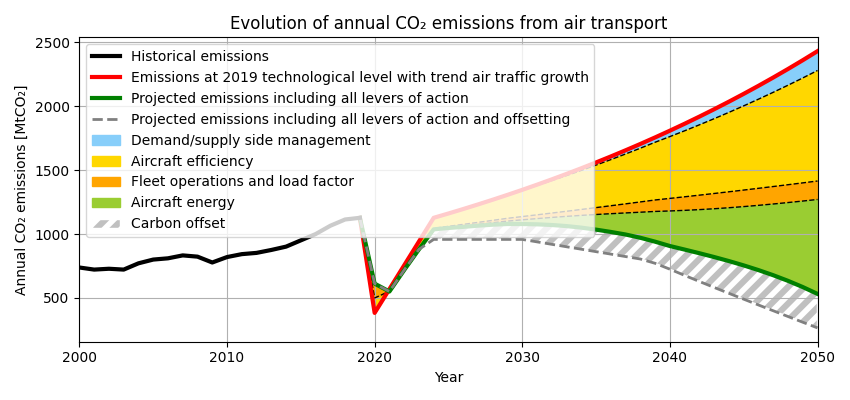

In [19]:
process.plot("air_transport_co2_emissions", save=False)